In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h1><center>Data Exploration on Housing </center></h1>
<h5><center>Matthew Xu</center></h5>

## Abstract
The dataset table provided in the is about housing and information concerning each location and amenities. The dataset contains 20640 rows with 10 columns describing location information. Each row corresponds to a unique location and data describing the location, including various data types such as both numerical and categorical values. Each row contains location attributes such as longitude, latitude, total bedrooms, total rooms, number of households, median house value, and ocean proximity, as well as population details such as median household age, population size, and median income. This report gathers visuals to describe the relationships and potential influence certain factors have on target labels, such as median house value, to potentially better sell housing.



In [18]:
#read csv
df = pd.read_csv('housing.csv')

In [3]:
#printing out first 5 rows
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Printing out the first five rows of the dataset shows the ten total features, with some being numerical and some being categorical data. The different types of data might need to be dealt with later, as using categorical in regression modeling is potentially erroneous. The feature 'ocean_proximity' contains non-numerical values, and longitude and latitude are numerical values that cannot be aggregated.

In [49]:
# show summary statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The above code block shows the summary statistics of the features in the dataset. It shows the mean, count, standard deviation, minimum, maximum, and first, second, and third quantiles. As mentioned earlier, some of these features are not fit for aggregation and summary statistics, such as longitiude and latitiude. Although it is numerically listed here, longitude and latitude act more like an address, making statistics not fit for analysis.

In [6]:
# show feature data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The code block above shows ten features with the counts of non-null values along with their data types. There are a total of 20460 entries, meaning that the feature total_bedrooms contains missing data values. Most of the data values are of type float, meaning the data is entered numerically. The Ocean_proximity feature is not, indicating it is of an object type, possibly a string.

In [7]:
# show number of missing values per feature
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The code block above counts the number of missing values in each feature. As stated earlier, the feature total_bedrooms contains 207 missing values while the rest of the features do not.

In [20]:
# drop missing values
noNA_df = df.dropna()

#show that missing values are now gone
noNA_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

This code drops the missing values from the entire dataset. Now, when counting missing values, all the features now have zero missing values. The data frame with no missing values is reassigned to another dataframe.

In [21]:
# drop categorical variables
filter_df = noNA_df.drop(columns=['longitude', 'latitude', 'ocean_proximity'])
filter_df.head()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


As stated earlier, categroical variables are usually not a good fit for regression analysis, therefore dropping them might benefit model preformance. The dropped data frame is reasigned to a new dataframe for further exploration.

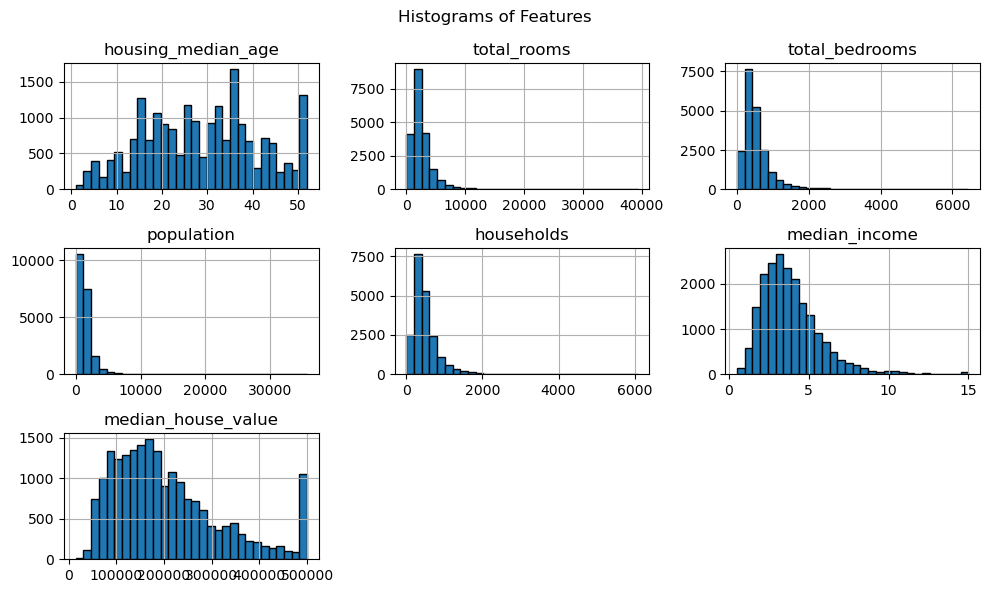

In [29]:
# Plot histograms for each feature
filter_df.hist(bins=30, edgecolor='black', figsize=(10, 6))

plt.suptitle('Histograms of Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The above code shows the general frequency distribution of each feature using histograms with frequency as the dependent variable. Most features appear to show a unimodal distribution that appears to follow a normal distribution. Distributions such as total rooms, total bedrooms, population, households, and median income tend to skew right, as the higher the values of those features result in lower frequency. Median house value shows outliers at the 500000 house value point. Most houses tend to be less frequent beyond the 300000 dollar point, but there appear to be a significant mount of expensive houses at the 500000 dollar point. The housing median age tends to be more diverse and variable as there is a large spread of ages amongst the population, with the least at ages before 2 and the highest frequency ages at 35-37.

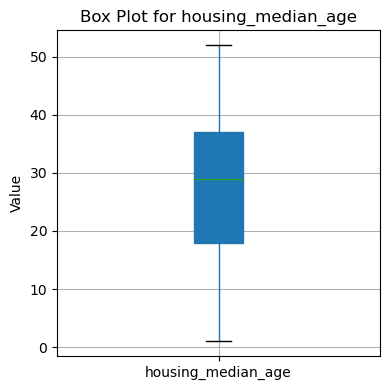

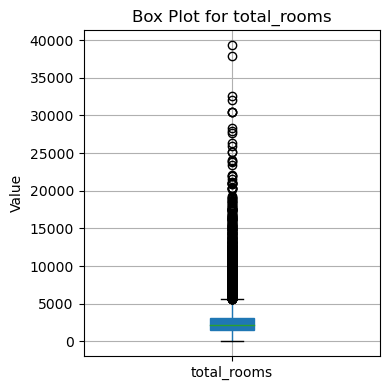

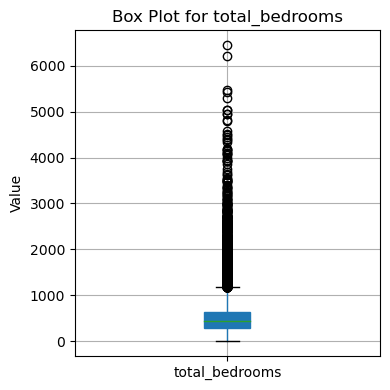

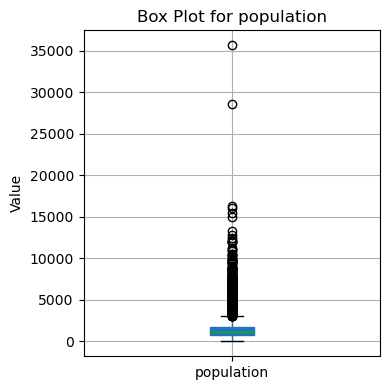

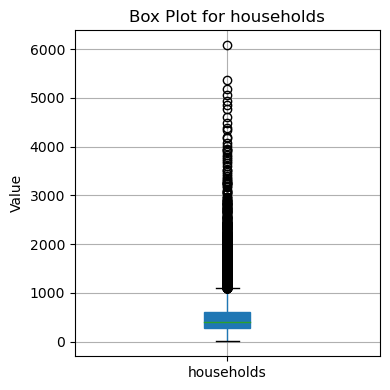

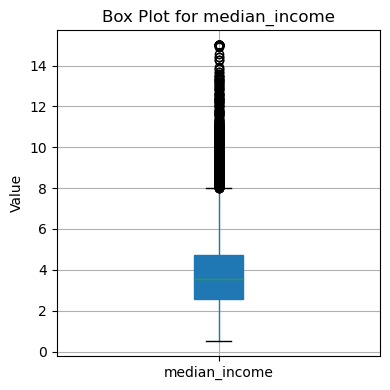

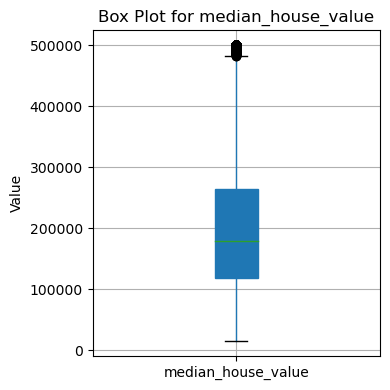

In [45]:
# for each feature create a boxplot
for feature in filter_df.columns:
    plt.figure(figsize=(4, 4))
    filter_df.boxplot(column=feature, patch_artist=True)
    plt.title(f'Box Plot for {feature}')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

The above diagrams show each of the boxplots for each numerical feature in the housing dataset. Housing median age appears to show a balanced distribution with the upper quantile at 55, the median at around 30, and the lower quantile at approx. 2. Median income, households, population, total bedrooms, and total rooms show a very skewed distribution where there are many black outliers above the upper quantile. Median house value has a smaller number of outliers above the upper quantile. The boxplots show a visual representation of certain summary statistics to show general distribution, especially when concerning outliers.

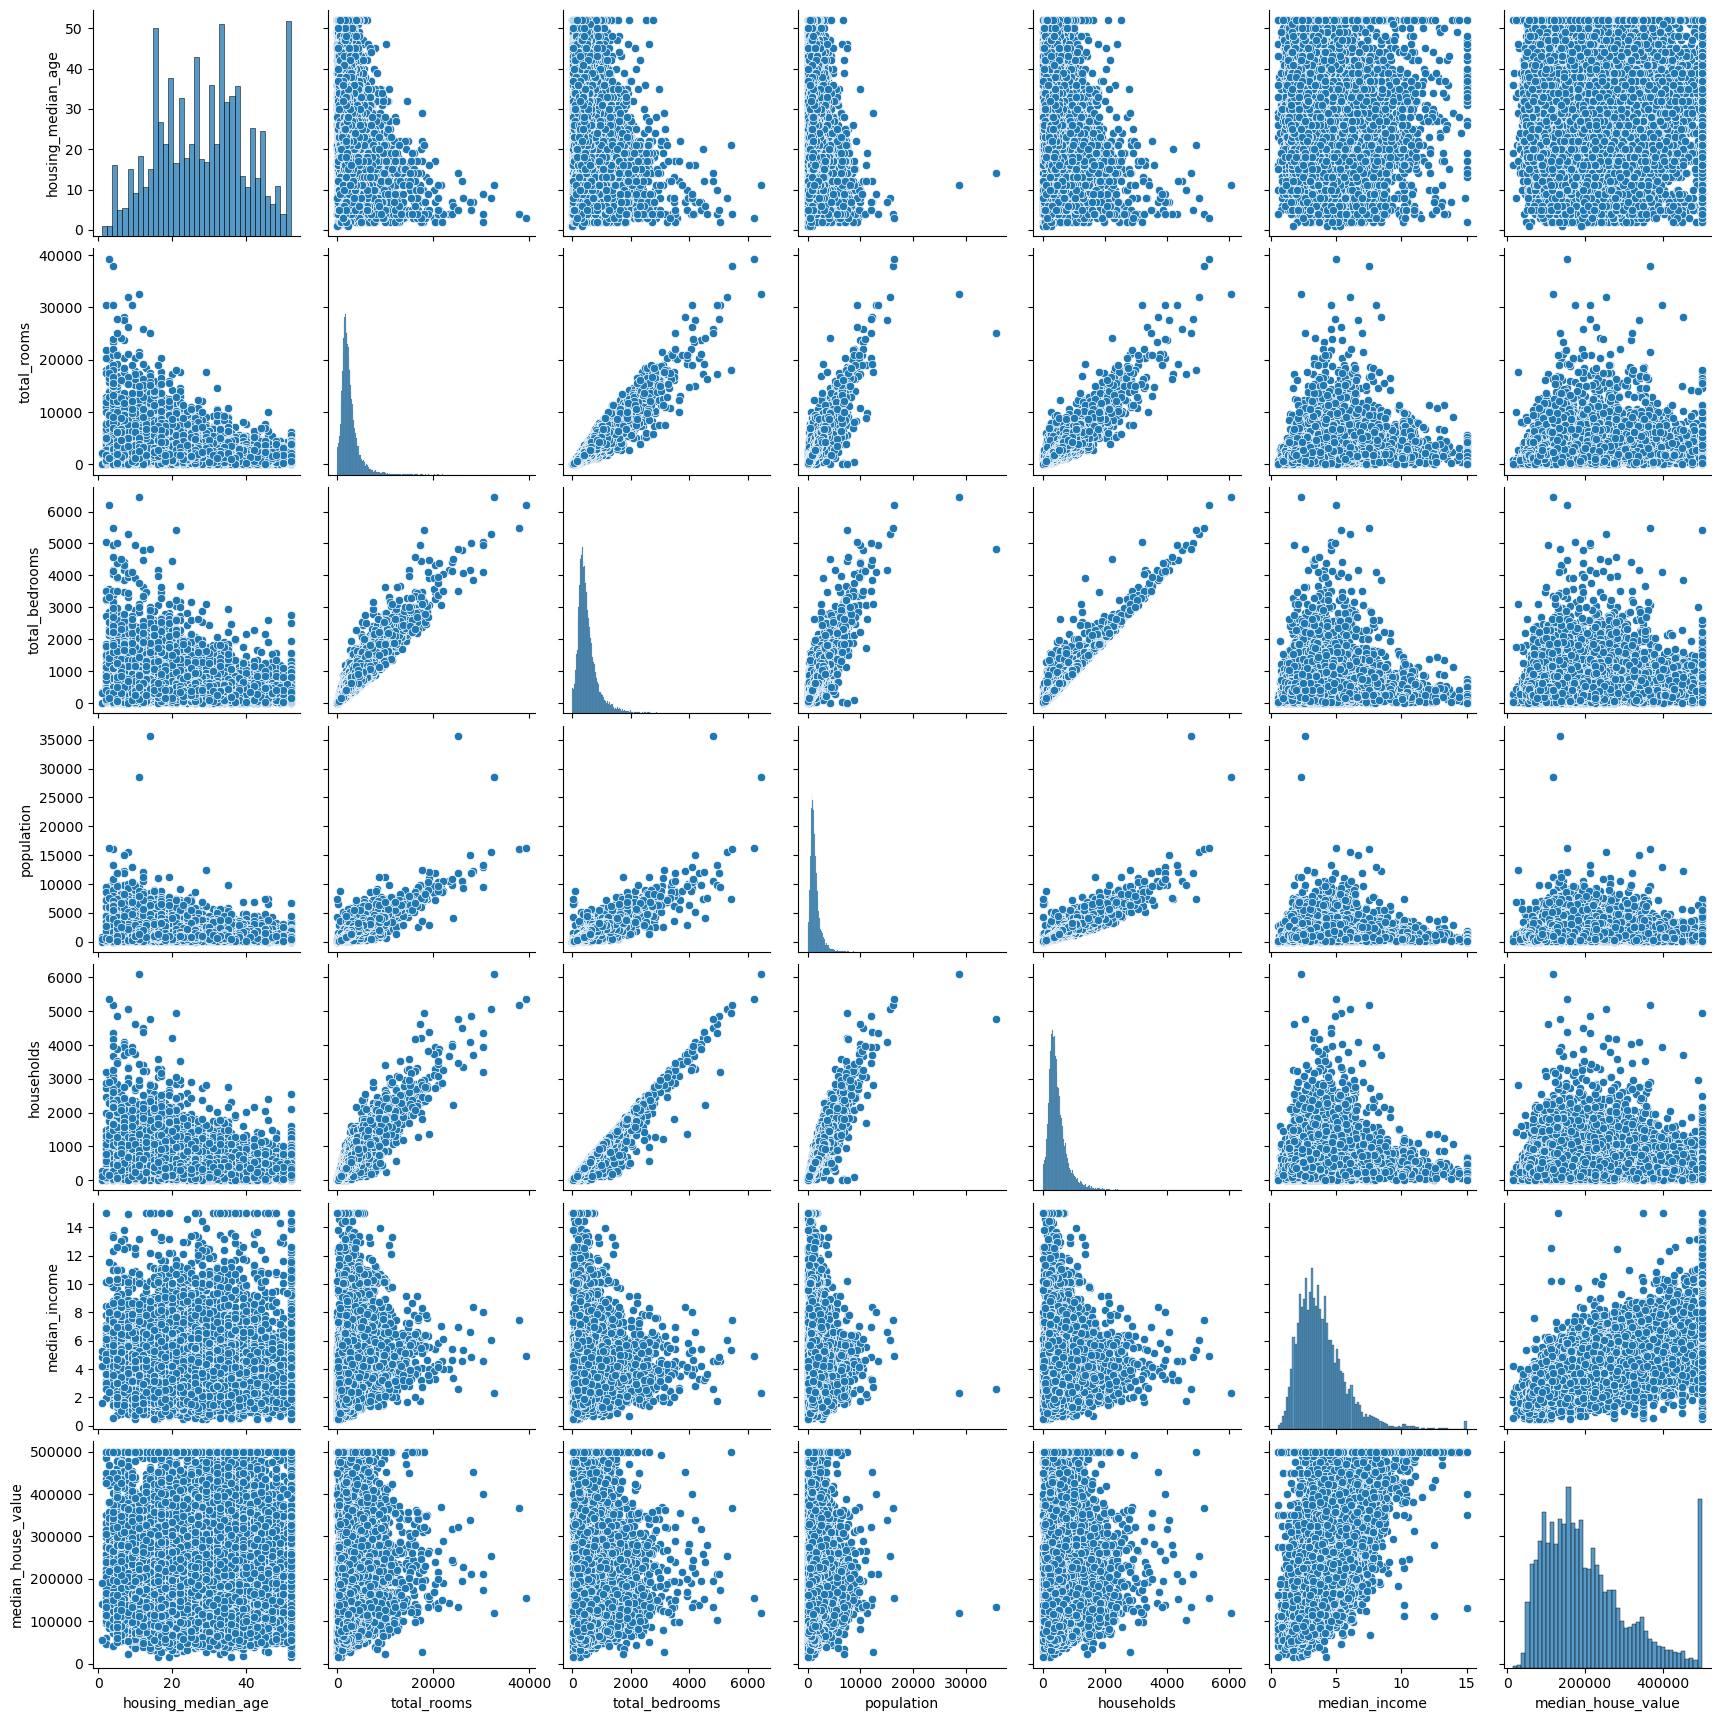

In [47]:
# pair plot between each numerical variable
sns.pairplot(filter_df, size = 2.5)
plt.show()

The above code shows a pairplot, a collection of scatterplots for each pair of numerical features. This is to see a general trend of pattern among a pair of features, indicating a possible correlation between them. Mainly, focusing on pairplots involving potential labeled features such as median house value is more influential to better sell high-priced houses. However, most features do not demonstrate a highly correlated pattern between the two features. However, some of the other features show possible patterns, such as total rooms and households, total bedrooms and households, population and households, and total rooms and total bedrooms. These pairs of features appear to show a somewhat linearly correlated relationship, indicating a possible linear regression between the variables. NOTE: The diagonal plots are pairs of variables of themselves (ex: household with household), therefore showing up as a frequency histogram plot.

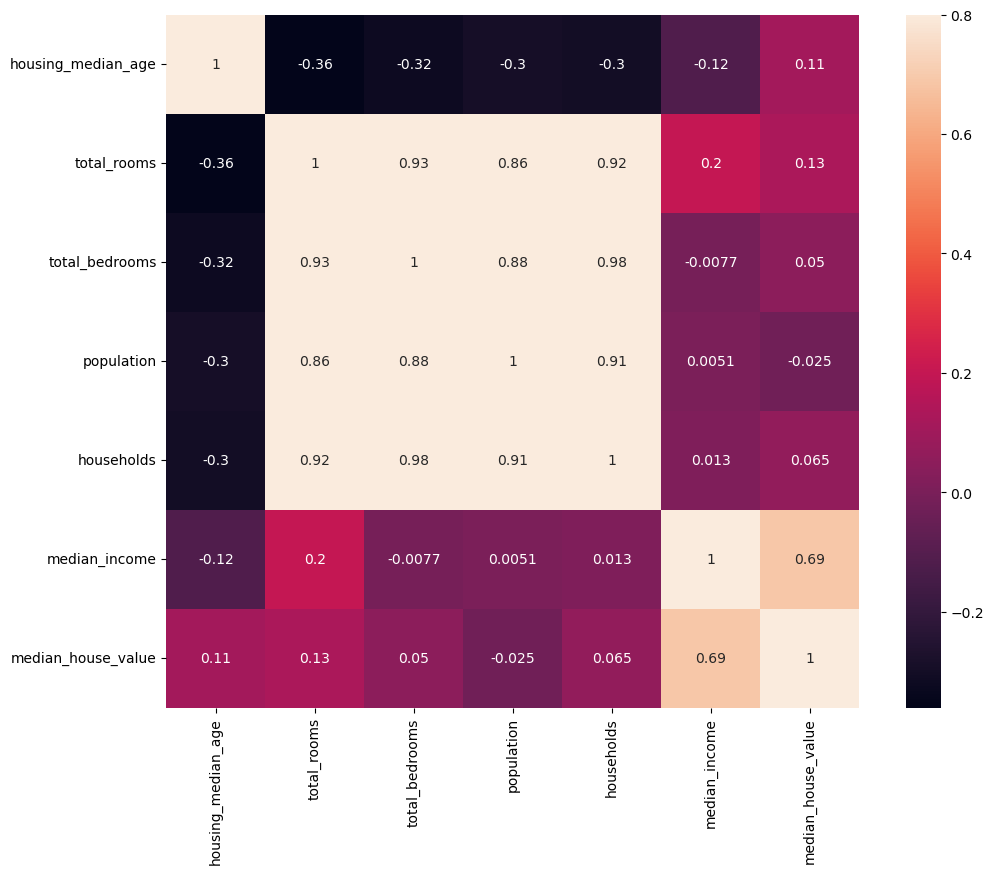

In [48]:
# correlation heatmap using pearson (linearly correlated)
corrmat = filter_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

The above plot shows a correlation heat map between each pair of numerical variables using pearson correlation coefficients, meaning linear correlation. As also indicated by the pairplot, pairs of features such as total rooms and households, total bedrooms and households, population and households, and total rooms and total bedrooms have strong positive linear correlations, all of them having a correlation coefficient of more than 0.85. The potential label feature of median house value to better build a model to sell houses does not appear to have many strong correlation relationships, with the highest being with median income at 0.69, indicating a moderaltely strong linear relationship. This makes sense, as high income individuals tend to purchase locations with higher house values.

## Conclusion
In conclusion on the prediction of median household value, the analysis of attributes such as longitude, latitude, total bedrooms, total rooms, number of households, median house value, and ocean proximity, alongside population metrics like median household age, population size, and median income, reveals that these factors do not exhibit strong linear correlations or clear patterns in predicting house values. This suggests that the relationships between these variables and house prices may be more complex than a simple linear model. As a result, other regression models, such as non-linear approaches or machine learning techniques, may be better suited for providing more accurate predictions of house values.